In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [26]:
# Generamos datos aleatorios
edad = np.random.randint(18, 65, 100)
estado_civil = np.random.choice(['Soltero', 'Casado', 'Divorciado', 'Viudo'], 100)
genero = np.random.choice(['Hombre', 'Mujer'], 100)
tiene_hijos = np.random.choice(['Sí', 'No'], 100)
compraria_productos_bebe = np.random.choice(['Sí', 'No'], 100)

# Creamos un DataFrame con los datos
datos = pd.DataFrame({'Edad': edad, 'Estado Civil': estado_civil, 'Género': genero,
                      '¿Tiene hijos?': tiene_hijos, '¿Compraría productos para bebé?': compraria_productos_bebe})

# Transformamos los datos categóricos a numéricos
datos['Género'] = datos['Género'].replace({'Hombre': 0, 'Mujer': 1})
datos['¿Tiene hijos?'] = datos['¿Tiene hijos?'].replace({'Sí': 1, 'No': 0})
datos['Estado Civil'] = datos['Estado Civil'].replace({'Soltero': 0, 'Casado': 1, 'Divorciado': 2, 'Viudo': 3})
datos['¿Compraría productos para bebé?'] = datos['¿Compraría productos para bebé?'].replace({'Sí': 1, 'No': 0})

# Dividimos los datos en entrenamiento y prueba
X = datos[['Edad', 'Estado Civil', 'Género', '¿Tiene hijos?']]
y = datos['¿Compraría productos para bebé?']
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2)

# Creamos el modelo de árbol de decisión con una profundidad máxima de 2
arbol = DecisionTreeClassifier(max_depth=2)

# Entrenamos el modelo
arbol.fit(X_entrenamiento, y_entrenamiento)


DecisionTreeClassifier(max_depth=2)

In [27]:
# Evaluamos el modelo
y_pred = arbol.predict(X_prueba)
print(confusion_matrix(y_prueba, y_pred))
print(classification_report(y_prueba, y_pred))

[[1 5]
 [5 9]]
              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.64      0.64      0.64        14

    accuracy                           0.50        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.50      0.50      0.50        20



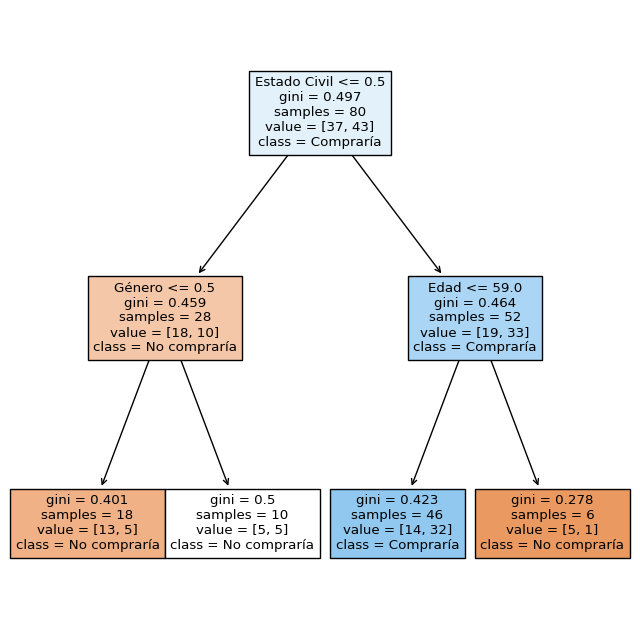

In [28]:
# Especificamos las etiquetas para cada variable
caracteristicas = ['Edad', 'Estado Civil', 'Género', '¿Tiene hijos?']
clases = ['No compraría', 'Compraría']

# Graficamos el árbol con las etiquetas
fig, ax = plt.subplots(figsize=(8, 8))
plot_tree(arbol, feature_names=caracteristicas, class_names=clases, filled=True, ax=ax)
plt.show()


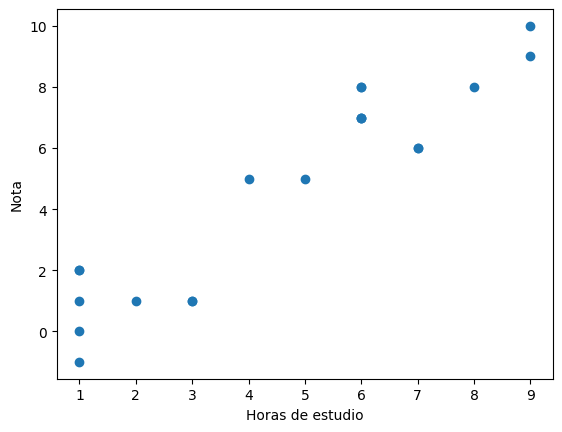

Coeficiente:  [1.1438172]
Intercepto:  -0.611559139784946


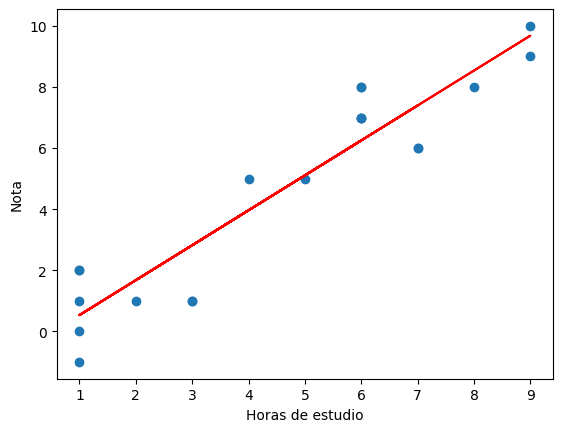

In [2]:
# Generamos datos aleatorios
horas_estudio = np.random.randint(1, 10, 20)
nota = horas_estudio + np.random.randint(-2, 3, 20)

# Creamos un DataFrame con los datos
datos = pd.DataFrame({'Horas de estudio': horas_estudio, 'Nota': nota})

# Graficamos los datos
plt.scatter(horas_estudio, nota)
plt.xlabel('Horas de estudio')
plt.ylabel('Nota')
plt.show()

# Creamos el modelo de regresión lineal
regresion = LinearRegression()

# Entrenamos el modelo
regresion.fit(datos[['Horas de estudio']], datos['Nota'])

# Imprimimos los coeficientes de la regresión
print('Coeficiente: ', regresion.coef_)
print('Intercepto: ', regresion.intercept_)

# Graficamos la recta de regresión
plt.scatter(horas_estudio, nota)
plt.plot(horas_estudio, regresion.predict(datos[['Horas de estudio']]), color='red')
plt.xlabel('Horas de estudio')
plt.ylabel('Nota')
plt.show()
